<a href="https://colab.research.google.com/github/rajitakolla/pythonCode/blob/master/INFO5502Assignment06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1 The Bootstrap and The Normal Curve

In this exercise, we will explore a dataset that includes the safety inspection scores for restaurants in the city of Austin, Texas. We will be interested in determining the average restaurant score for the city from a random sample of the scores; the average restaurant score is out of 100. We’ll compare two methods for computing a conﬁdence interval for that quantity: the bootstrap resampling method, and an approximation based on the Central Limit Theorem.


In [0]:
import datascience as dsc
import matplotlib as mat
%matplotlib inline

In [17]:
pop_resturants = dsc.Table.read_table("/content/sample_data/restaurant_inspection_scores.csv").drop("Facility ID","Process Description")
pop_resturants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


Run the cells below to plot a histogram of scores from pop_resturants

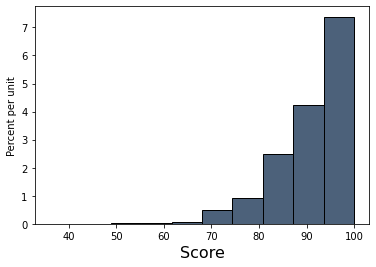

In [18]:
pop_resturants.hist("Score")

This is the population mean

In [0]:
import numpy as np

In [22]:
pop_mean = np.mean(pop_resturants.column('Score'))
pop_mean

91.40706693478886

Often it is impossible to find complete datasets like this. Imagine we instead had access only to a random sample of 100 resturant inspections, called resturant_sample. The table is created below. We are interested in using this sample to estimate the population mean.

In [23]:
restaurant_sample = pop_resturants.sample(100, with_replacement = False)
restaurant_sample

Restaurant Name,Zip Code,Inspection Date,Score,Address
Roaring Fork,78759,08/18/2015,82,"10850 STONELAKE BLVD AUSTIN, TX 78759 (30.400409, -97.73 ..."
Rutland Market,78758,02/24/2016,76,"900 RUTLAND DR AUSTIN, TX 78758 (30.365913, -97.698271)"
Chipotle Mexican Grill #847,78758,05/29/2014,90,"10515 N MOPAC EXPY NB Bunit 200 AUSTIN, TX 78758"
Zarab's Kababs,78705,10/27/2015,73,"2001 GUADALUPE ST Unit A1 AUSTIN, TX 78705 (30.282893, - ..."
Bombay Express,78753,08/03/2016,92,"13000 N IH 35 SVRD SB Bunit 216 AUSTIN, TX 78753 (30.408 ..."
El Tenampa Bar,78617,04/10/2014,88,"2429 E SH 71 WB AUSTIN, TX 78617 (30.21403, -97.660192)"
Brew Market and Cafe,78722,05/07/2015,93,"3842 AIRPORT BLVD AUSTIN, TX 78722 (30.289795, -97.707404)"
Johnny G's Butcher Block,78748,09/14/2016,97,"11600 MANCHACA RD Unit H AUSTIN, TX 78748 (30.151943, -9 ..."
Flamingo Cantina,78701,03/20/2015,84,"515 E 6TH ST AUSTIN, TX 78701 (30.266629, -97.737703)"
Casa de Luz,78704,02/25/2015,84,"1701 TOOMEY RD AUSTIN, TX 78704 (30.264812, -97.761446)"


Run the cell below to plot a histogram of sample scores from restaurant_sample

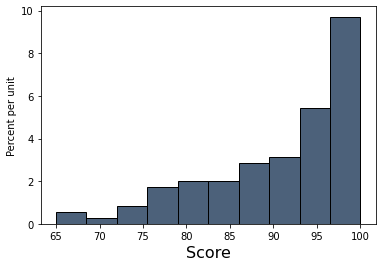

In [24]:
restaurant_sample.hist('Score')

This is the sample Mean

In [26]:
sample_mean = np.mean(restaurant_sample.column('Score'))
sample_mean

90.69

# 1.1 Question 1

Complete the function one resampled mean below. It should take in an original table data, with a column Score, and return the mean score of one resampling from data.


In [28]:
def one_resampled_mean(data):
  return np.mean(data.select('Score').sample().column(0))
  pass

#Visualize one call of your function
this_mean = one_resampled_mean(restaurant_sample)
this_mean

90.92

#1.2 Question 2

Complete the function bootstrap scores below. It should take no arguments. It should simulate drawing 5000 resamples from restaurant sample and compute the mean restaurant score in each resample. It should return an array of those 5000 resample means.


In [0]:
def create_an_empty_array():
  return dsc.util.make_array()
  pass

In [92]:
Total_Samples = 5000
def bootstrap_scores():
  resampled_means = create_an_empty_array()
  for i in range(Total_Samples):
    resampled_means = np.append(resampled_means, one_resampled_mean(restaurant_sample))
  return resampled_means
  pass


resampled_means = bootstrap_scores()
resampled_means

array([92.23, 91.02, 90.3 , ..., 90.15, 91.58, 91.1 ])

plot a histogram to analyse the result 

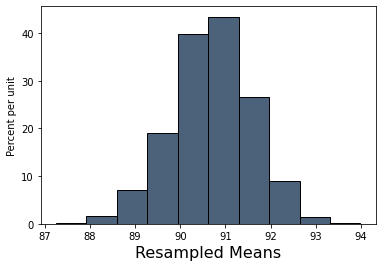

In [62]:
final_table = dsc.Table().with_column("Resampled Means",resampled_means)
final_table.hist()

# 1.3 Question 3


Compute a 95 percent conﬁdence interval for the average restaurant score using the array resampled means.


In [63]:
lower_bound = np.percentile(resampled_means, 2.5)
upper_bound = np.percentile(resampled_means, 97.5)
print("95% confidence interval for the average resturant score, computed by bootstrapping:\n(",lower_bound,",",upper_bound, ")")

95% confidence interval for the average resturant score, computed by bootstrapping:
( 88.88 , 92.35 )


#1.4 Question 4


What distribution is the histogram between question 2 and 3 displaying (that is, what data are plotted), and why does it have that shape?

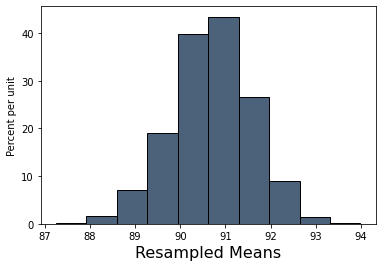

In [64]:
final_table = dsc.Table().with_column("Resampled Means",resampled_means)
final_table.hist()

**Answer)**  Sample Means are in Normal Distribution shape. Central Limit theorem states that "when independent random variables are added, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed and the random variable distribution will be normal or nearly normal if the sample size is large enough". So the curve has a bell shape

# 1.5 Question 5


Does the distribution of the sampled scores look normally distributed? State “yes” or “no” and describe in one sentence why you should expect this result.


** Answer)** No because Central Limit Theorem is not applicable for the sampled score instead we apply that on means, sums and other mathematical computations. 

Its due to the fact that 
1. If group has a normal distribution around 95% of them lie within two standard deviations of means.
2. The central limit theorem states that the quantitative relationship between standard deviation of an array of numbers and means of samples extracted from the set. 

# 1.6 Question 6


Without referencing the array resampled means or performing any new simulations, calculate an interval around the sample mean that covers approximately 95% of the numbers in the resampled means array. This conﬁdence interval should look very similar to the one you computed in Question 3.


In [55]:
sample_mean = np.mean(restaurant_sample.select('Score').column(0))
standard_deviation_sample = np.std(restaurant_sample.select('Score').column(0))

mean_of_standard_deviation = standard_deviation_sample/np.sqrt(restaurant_sample.num_rows)

square_of_mean_standard_deviation = 2*mean_of_standard_deviation
lower_bound_new = sample_mean-square_of_mean_standard_deviation
upper_bound_new = sample_mean+square_of_mean_standard_deviation


print("95% confidence interval for the average resturant score, computed by bootstrapping:\n(",lower_bound_new,",",upper_bound_new, ")")


95% confidence interval for the average resturant score, computed by bootstrapping:
( 88.94398854528384 , 92.43601145471615 )


# 2 Testing the Central Limit Theorem

To recap the properties we just saw: The Central Limit Theorem tells us that the probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.


#2.1 Question 1

Deﬁne the function one statistic prop heads which should return exactly one simulated statistic of the proportion of heads from n coin ﬂips.

In [0]:
def create_an_empty_array_params(*args):
  return dsc.util.make_array(args[0],args[1])
  pass

In [126]:
coin_proportions = create_an_empty_array_params(.5,.5) # heads and tails
def one_statistic_prop_heads(n):
  simulated_proportions = dsc.util.sample_proportions(n,coin_proportions)
  prop_heads = simulated_proportions.item(0)
  return prop_heads
  pass

one_statistic_prop_heads(50)

0.5

#2.2 Question 2

The CLT only applies when sample sizes are “suﬃciently large.” This isn’t a very precise statement. Is 10 large? How about 50? The truth is that it depends both on the original population distribution and just how “normal” you want the result to look. 

Consider a coin ﬂip. If we say Heads is 1 and Tails is 0, then there’s a 50% chance of getting a 1 and a 50% chance of getting a 0, which deﬁnitely doesn’t match our deﬁnition of a normal distribution. The average of several coin tosses, where Heads is 1 and Tails is 0, is equal to the proportion of heads in those coin tosses (which is equivalent to the mean value of the coin tosses), so the CLT should hold true if we compute the sample proportion of heads many times. 

Write a function called sample size n that takes in a sample size n. It should return an array that contains 5000 sample proportions of heads, each from n coin ﬂips.


In [133]:
def sample_size_n(n):
  coin_proportions = create_an_empty_array_params(.5,.5)
  head_proportions = create_an_empty_array()
  for i in np.arange(5000):
    prop_heads = one_statistic_prop_heads(n)
    head_proportions = np.append(head_proportions, prop_heads)
  return head_proportions
  pass

sample_size_n(50)

array([0.52, 0.44, 0.56, ..., 0.48, 0.54, 0.4 ])

#2.3 Question 3


Write a function called empirical sample mean sd that takes a sample size n as its argument. The function should simulate 500 samples with replacement of size n from the ﬂight delays dataset, and it should return the standard deviation of the means of those 500 samples.


In [0]:
united_summer  = dsc.Table.read_table("/content/sample_data/united_summer2015.csv")

In [141]:
def emperical_sample_mean_sd(n):
  sample_means = create_an_empty_array()
  for i in np.arange(500):
    sample_data = united_summer.sample(10,with_replacement=True)
    sample_means=np.append(sample_means, np.mean(sample_data.column('Delay')))
  return np.std(sample_means)
  pass

emperical_sample_mean_sd(10)

12.888061322014261

#2.4 Question 4


Now, write a function called predict sample mean sd to ﬁnd the predicted value of the standard deviation of means according to the relationship between the standard deviation of the sample mean and sample size that is discussed in the textbook. It takes a sample size n (a number) as its argument. It returns the predicted value of the standard deviation of the mean delay time for samples of size n from the ﬂight delays (represented in the table united).


In [142]:
def predict_sample_mean_sd(n):
  return np.std(united_summer.column('Delay'))/(n**0.5) 
  pass

predict_sample_mean_sd(10)

12.484735400972708